# Train/val accuracy/loss curves

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = os.path.abspath(os.path.join('..'))

SqueezeNet models trained on different types of datasets:
- imbalanced
- balanced undersampling frequent classes than oversampling rare classes
- balanaced oversampling rare classes

In [6]:
logs = {
    'imbalanced': os.path.join(path, 'logs_pytorch_SqueezeNet_finetunning_imbalanced_299_20171106_1851', 'log.csv'),
    'balanced-under/over': os.path.join(path, 'logs_pytorch_SqueezeNet_finetunning_balanced2_299_20171110_1940', 'log.csv'),
    'balanced-over-25': os.path.join(path, 'logs_pytorch_SqueezeNet_finetunning_balanced3_299_20171113_0020', 'log.csv'),
    'balanced-over-50': os.path.join(path, 'logs_pytorch_SqueezeNet_finetunning_balanced3_299_20171113_1259', 'log.csv')    
}

In [8]:
dfs = []
for name in logs:
    dfs.append(pd.read_csv(logs[name], index_col='epoch'))

In [9]:
dfs[0].head()

,train_loss,train_prec1,val_loss,val_prec1
epoch,,,,
0,3.762781,27.146870,3.100415,38.258929
1,2.861272,40.296449,2.709459,43.541667
2,2.559267,44.765750,2.533833,45.446429
3,2.376490,47.454354,2.405000,48.050595
4,2.238422,49.919743,2.323775,48.005952


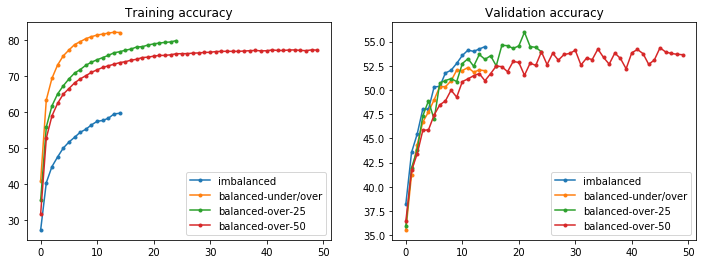

In [13]:
plt.figure(figsize=(12, 4))

var_name = 'train_prec1'
plt.subplot(121)
plt.title("Training accuracy")
for df, log_name in zip(dfs, logs):
    plt.plot(df.index.values, df[var_name].values, '.-', label=log_name)    
plt.legend()

var_name = 'val_prec1'
plt.subplot(122)
plt.title("Validation accuracy")
for df, log_name in zip(dfs, logs):
    plt.plot(df.index.values, df[var_name].values, '.-', label=log_name)    
plt.legend()
